# Importing required Liberaries

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Proability density function for failure time t

In [6]:
def pdf_for_failure(t,lamda):
    pdf=[]
    for i in t:
        if i>=0:
            pdf.append(1/lamda * np.exp(-i/lamda))
        else:
            pdf.append(0)
    return pdf

# PDF validity

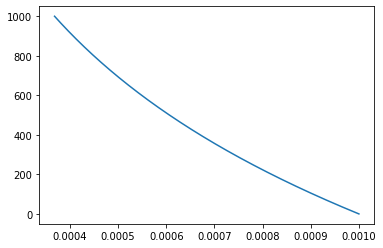

In [7]:
samples=np.random.normal(size=10000)
bins=np.linspace(0,1000,1001)
x=np.linspace(0,1000,1000)
x=pdf_for_failure(x,1000)
histogram, bins = np.histogram(samples, bins=bins, density=True)
bin_centers = 0.5*(bins[1:] + bins[:-1])
plt.plot(x, bin_centers, label="PDF")
plt.show()

In [8]:
def integeral_pdf(t,lamda):
    return (-np.exp(-t/lamda))

In [9]:
#integral of pdf is
positive_infnity = float('inf') 
lamda=1000
result=(integeral_pdf(positive_infnity,lamda)) - (integeral_pdf(0,lamda)) #result=1 means area under the curve is 1 which stisfies the 2nd cond
result 

1.0

b. How long after installation should we do preventative maintenance if we wish to have the probability
of unexpected failure be less than 1%? What about 10%, 50%, and 99%?

In [10]:
one_per=(((integeral_pdf(1,lamda))- (integeral_pdf(0,lamda)))*100) # for 1%
ten_per=(((integeral_pdf(10,lamda))- (integeral_pdf(0,lamda)))*100)# for 10%
fifty_per=(((integeral_pdf(50,lamda))- (integeral_pdf(0,lamda)))*100)# for 50%
nintynine_per=(((integeral_pdf(99,lamda))- (integeral_pdf(0,lamda)))*100)# for 99%
print('{:.2f} number of days'.format(one_per))
print('{:.2f} number of days'.format(ten_per))
print('{:.2f} number of days'.format(fifty_per))
print('{:.2f} number of days'.format(nintynine_per))

0.10 number of days
1.00 number of days
4.88 number of days
9.43 number of days


Mean Failure time

In [11]:
def pdf_mean(start_range,end_range,lamda):
    return (-lamda*np.exp(-end_range/lamda)) - (-lamda*np.exp(-start_range/lamda)) #E(X)=lamda
mean=pdf_mean(0,positive_infnity,1000)
mean

1000.0

In [12]:
percents=[one_per,ten_per,fifty_per,nintynine_per]
E_x=[]
for per in percents:
    E_x.append(pdf_mean(0,per,1000))
E_x

[0.09994502182598808, 0.9945217601876948, 4.865184015235741, 9.381446254418961]

VARIANCE

In [13]:
E_x2=(lamda**2) #2*lamda^2
E_x2

1000000

In [14]:
var= [E_x2-(Ex**2) for Ex in E_x] # 2*lamda^2 - lamda^2
var

[999999.9900109926, 999999.0109264685, 999976.3299844979, 999911.9884661755]

Write a program that generates samples of t from its distribution. Evaluate the average running cost
R for each of tm 2 f1; 10; 100; 1000gdays. In each case, generate 106 samples.

In [15]:
t=np.linspace(1,1000,1000,dtype='int')
cm=50
cr=250
random.seed(42)
tm=[1,10,100,1000]

In [16]:
cost_rep=[]
cost_man=[]
count=0
for i in tm:
    for j in t:
        if j<=i:
            R=cr/j
            cost_rep.append(R)
        else:
            R=cm/i
            cost_man.append(R)

Analytically compute at what time tm we should schedule preventative maintenance,
to minimize the running cost of the pump.

In [17]:
for i in cost_man:
    min=i
    if i < min:
        min=i
index_cm=round(cost_man.index(min)/999)
print('cost = {} and tm ={}'.format(min,tm[index_cm]))

cost = 0.5 and tm =100
